## 셀레니움으로 뉴스 데이터 가져오기
### 네이버 뉴스 16-17년도 (검색어: 가로수길 -양산 -창원)

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys ## Keys는 키보드라고 생각하면됨
from selenium.webdriver.common.by import By
import time
import pandas as pd

url="https://search.naver.com/search.naver?sm=tab_hty.top&where=news&ssc=tab.news.all&query=%EC%8B%A0%EC%82%AC+%EA%B0%80%EB%A1%9C%EC%88%98%EA%B8%B8+-%EC%96%91%EC%82%B0+-%EC%B0%BD%EC%9B%90&oquery=%EA%B0%80%EB%A1%9C%EC%88%98%EA%B8%B8+-%EC%96%91%EC%82%B0+-%EC%B0%BD%EC%9B%90&tqi=j47nBdqo1SCssh6FgWGssssst%2B0-355606&ackey=82yqn76l&nso=so%3Ar%2Cp%3Afrom20160101to20171231&de=2017.12.31&ds=2016.01.01&mynews=0&office_category=0&office_section_code=0&office_type=0&pd=3&photo=0&service_area=0&sort=0"

driver = webdriver.Chrome()
driver.maximize_window
#url로 이동

driver.get(url)
time.sleep(2)

## 스크랩 rep번 내리기
rep = 30

display_box_css = "body"
display_box = driver.find_element(By.CSS_SELECTOR, display_box_css)
for i in range(rep):
    display_box.send_keys(Keys.END)
    time.sleep(1)

# 스크롤 맨위로
display_box.send_keys(Keys.HOME)

# 제목 추출하기
title_css ="a.ox1N67gcMkHhMh7hbfHi.VZxw34rcBHTWHgERxv0b > span"
titles = driver.find_elements(By.CSS_SELECTOR, title_css)

preview_css = "div > a.ox1N67gcMkHhMh7hbfHi.VbDEeYkHZhXLquPjGrKK > span"
previews = driver.find_elements(By.CSS_SELECTOR, preview_css)


temp_dict = {
    "기사제목": [],
    "미리보기": []
}

for title, preview in zip(titles, previews):
    temp_dict["기사제목"].append(title.text)
    temp_dict["미리보기"].append(preview.text)

naver_news_1617 = pd.DataFrame(temp_dict)
naver_news_1617.to_csv("../../data_resources/naver_news_1617.csv", index=False)

naver_news_1617

,기사제목,미리보기
0,"삼화페인트, 광화문·가로수길서 `세이브 온` 캠페인 진행",[사진제공 = 삼화페인트] 삼화페인트공업이 서울시와 함께 26일부터 30일까지 5일...
1,'2TV 생생정보' 연탄 숯불갈비-철판 해물-곰탕 & 신사동 가로수길 맛집...,가마솥에서 장작불로 우려내는 진한 곰탕 맛이 좋다. 한편 이날 '2TV 생생정보 대...
2,코엑스·가로수길 등 강남 8곳서 '크리스마스 캐럴 페스타',"축제 장소는 신사동 가로수길, 코엑스 밀레니엄 프라자, 삼성동 맛의 거리 등 강남구..."
3,"""종로 뜨고 강남 지고""…희비 엇갈린 서울 상권","압구정로데오, 신사동 가로수길 등 서울의 대표 상권으로 군림하던 강남 상권은 올해 ..."
4,"‘이방인’ 서민정, 딸 예진 양과 가로수길 데이트…“최고의 짜장면”",공개된 사진 속에는 서울 강남구 신사동 가로수길의 한 중국집에서 식사를 하고 있는 ...
...,...,...
305,가을철 감성을 느끼는 신사동 가로수길에서 함께 하는 맛집,이처럼 감성이 풍부해지는 곳으로는 신사동 가로수길도 예외는 아니다. 서울의 중심 강...
306,올림픽 헤리티지 컬렉션 `달항아리` 한정판 출시,올림픽 헤리티지 컬렉션 2018 달항아리 에디션 한정판은 갤러리 현대 아트큐브(삼청...
307,"로맨틱한 가을철, 신사동 가로수길에서 즐기는 데이트 맛집",그 중 신사동 가로수길은 데이트 코스와 모임 장소의 맛집이 많은 유명한 핫 플레이스...
308,서울·부산 핫플레이스서 현대카드 M포인트 쓰세요,"미식 지역은 서울 신사동 가로수길, 연남동·연희동, 이태원 경리단길, 부산 해운대 ..."


In [2]:
import pandas as pd

df1617 = pd.read_csv("../../data_resources/naver_news_1617.csv")

df1617["concat"] = df1617["기사제목"] + df1617["미리보기"]

df1617["concat"]

0      삼화페인트, 광화문·가로수길서 `세이브 온` 캠페인 진행[사진제공 = 삼화페인트] ...
1      '2TV 생생정보' 연탄 숯불갈비-철판 해물-곰탕 & 신사동 가로수길 맛집...가마...
2      코엑스·가로수길 등 강남 8곳서 '크리스마스 캐럴 페스타'축제 장소는 신사동 가로수...
3      "종로 뜨고 강남 지고"…희비 엇갈린 서울 상권압구정로데오, 신사동 가로수길 등 서...
4      ‘이방인’ 서민정, 딸 예진 양과 가로수길 데이트…“최고의 짜장면”공개된 사진 속에...
                             ...                        
305    가을철 감성을 느끼는 신사동 가로수길에서 함께 하는 맛집이처럼 감성이 풍부해지는 곳...
306    올림픽 헤리티지 컬렉션 `달항아리` 한정판 출시올림픽 헤리티지 컬렉션 2018 달항...
307    로맨틱한 가을철, 신사동 가로수길에서 즐기는 데이트 맛집그 중 신사동 가로수길은 데...
308    서울·부산 핫플레이스서 현대카드 M포인트 쓰세요미식 지역은 서울 신사동 가로수길, ...
309    [입덕가이드③] "벌레·학생회장·나비야"…더보이즈의 귀여운 TMI(서울에선 어디가 ...
Name: concat, Length: 310, dtype: object

## WORD CLOUD로 키워드 분석을 해보자 (2016-2017)

In [10]:
from konlpy.tag import Okt
import re

okt = Okt()
stop_words = ["신사동","부산","제공", "지난", "피쉬", "세계", "선미", 
              "아르투아","코리아","컬럼비아", "물고기","오후","대표", "사진","덴마크", 
              "동원", "가로수길", "서울", "강남", "기자", "블루", '오니','츠카','타이거',
              "지난", "지역", "프레", "이번", "스텔라", "참치", "사람",
              "최근", "레이스", "당나귀", "니팅"]
word_list = []

for i, news in enumerate(df1617["concat"].tolist()):
    # 기사에서 특문 제거
    news_clean = re.sub(r"[^가-힣a-zA-Z0-9-\s]", "", news)
    # 형태소 분석 -okt를 이용해서 명사 추출
    result = okt.nouns(news_clean)

    for word in result:
        # 단어가 2글자 이상이거나 불용어가 아닐 때만 사용
        if len(word) > 1 and word not in stop_words:
            word_list.append(word)
    if i % 10 == 0 :
        print(i, result)



0 ['삼화', '페인트', '광화문', '가로수길', '세이브', '온', '캠페인', '진행', '사진', '제공', '삼화', '페인트', '삼화', '페인트', '공업', '서울시', '간', '창동역', '광화문', '신사동', '가로수길', '세이브', '온', '캠페인', '전개', '삼화', '페인트', '서울시', '기획', '세이브', '온', '캠페인', '시민', '힘', '에너지', '취약', '계층', '시민', '참여', '기부', '시민', '창동역', '위치', '플랫폼']
10 ['요미', '회', '초콜릿', '맛집', '리스트', '신사동', '가로수길', '보석', '초콜릿', '성남', '분수', '요미', '회', '초콜릿', '맛집', '리스트', '신사동', '가로수길', '보석', '초콜릿', '성남', '분당', '돛단배', '초콜릿', '케익', '후기', '맛', '평가', '위치', '가격', '요미', '회', '초콜릿', '편', '로맨틱', '크리스마스', '당신', '위', '음식', '초콜릿', '를', '소개', '날', '요미', '회', '자체', '기준', '선정']
20 ['신사동', '가로수길', '형형색색', '개옷', '오후', '서울', '강남구', '신사동', '가로수길', '일대', '은행나무', '신사동', '주민', '개옷', '가로수길', '양쪽', '은행나무', '그루', '설치', '그래피티', '니팅', '행사', '내년', '전시', '기사', '제보', '및', '문의', '클릭']
30 ['칼리프', '애쉬', '신사동', '매장', '가로수길', '핫', '레이스', '사진', '칼리프', '애쉬', '제공', '칼리프', '애쉬', '신사동', '가로수길', '매장', '브랜드', '다크', '아방가르드', '감성', '모던', '소비자', '발길', '칼리프', '애쉬', '신사동', '가로수길', '매장', '신상', '아이', '웨어', '만날', '수'

In [18]:
from collections import Counter

word_count = Counter(word_list)

print(word_count.most_common(70))

[('오픈', 196), ('스토어', 145), ('강남구', 127), ('브랜드', 89), ('팝업', 83), ('재규어', 79), ('매장', 75), ('랜드로버', 71), ('위치', 58), ('상권', 56), ('패션', 56), ('맛집', 54), ('거리', 53), ('압구정', 50), ('운영', 49), ('스튜디오', 49), ('갤러리', 47), ('분위기', 38), ('포토', 37), ('유니클로', 36), ('콘셉트', 35), ('임대료', 34), ('밥집', 33), ('컨셉', 33), ('한강', 32), ('행사', 32), ('참석', 32), ('코스', 30), ('공간', 29), ('기념', 29), ('신사역', 28), ('전시', 28), ('신사', 28), ('해피', 28), ('진행', 26), ('가격', 25), ('국내', 25), ('그래피티', 25), ('글로벌', 25), ('빌딩', 24), ('제품', 24), ('프로젝트', 24), ('상점', 23), ('고객', 23), ('데이트', 22), ('음식', 22), ('스타', 22), ('이벤트', 22), ('라이프스타일', 22), ('규모', 21), ('한국', 21), ('경제', 21), ('장소', 20), ('모습', 20), ('컬렉션', 20), ('마켓', 20), ('트렌드', 19), ('뷰티', 19), ('부동산', 19), ('프리미엄', 19), ('가을', 19), ('출시', 18), ('마리', 18), ('랄프', 18), ('로렌', 18), ('마르', 18), ('공공미술', 18), ('방문', 17), ('스트리트', 17), ('바로', 17)]


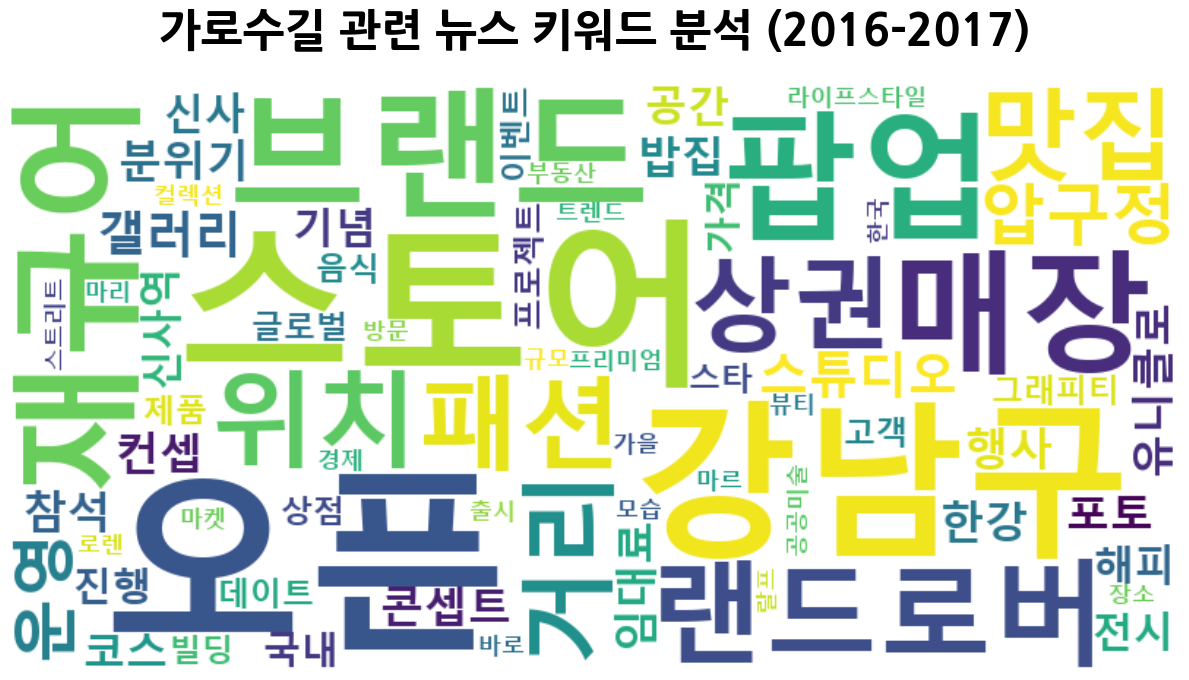

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib  # 한글 폰트 자동 적용
import numpy as np
from PIL import Image

mask_img = np.array(Image.open("../../data_resources/circle.png"))


# 워드클라우드 설정 (마스크 없음)
wc = WordCloud(
    font_path = r"C:\Windows\Fonts\malgunbd.ttf",
    background_color='white',

    width=800,
    height=400
)

# 워드클라우드 생성
wc.generate_from_frequencies(dict(word_count.most_common(70)))

# 시각화
plt.figure(figsize=(12, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("가로수길 관련 뉴스 키워드 분석 (2016-2017)",
          fontsize=32, fontweight='bold', pad=30)
plt.tight_layout()
plt.show()


## 네이버 뉴스 18-19년도 (검색어: 가로수길 -광양시 -안양 -강진군 -양산 -창원 -포항 -터키 -담양 -벤츠 -진주 -횡성 -장성군 -완도)

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys ## Keys는 키보드라고 생각하면됨
from selenium.webdriver.common.by import By
import time
import pandas as pd

url="https://search.naver.com/search.naver?sm=tab_hty.top&where=news&ssc=tab.news.all&query=%EC%8B%A0%EC%82%AC+%EA%B0%80%EB%A1%9C%EC%88%98%EA%B8%B8+-%EC%96%91%EC%82%B0+-%EC%B0%BD%EC%9B%90&oquery=%EA%B0%80%EB%A1%9C%EC%88%98%EA%B8%B8+-%EC%96%91%EC%82%B0+-%EC%B0%BD%EC%9B%90&tqi=j47nBdqo1SCssh6FgWGssssst%2B0-355606&ackey=82yqn76l&nso=so%3Ar%2Cp%3Afrom20160101to20171231&de=2017.12.31&ds=2016.01.01&mynews=0&office_category=0&office_section_code=0&office_type=0&pd=3&photo=0&service_area=0&sort=0"

driver = webdriver.Chrome()
driver.maximize_window
#url로 이동

driver.get(url)
time.sleep(2)

## 스크랩 rep번 내리기
rep = 30

display_box_css = "body"
display_box = driver.find_element(By.CSS_SELECTOR, display_box_css)
for i in range(rep):
    display_box.send_keys(Keys.END)
    time.sleep(1)

# 스크롤 맨위로
display_box.send_keys(Keys.HOME)

# 제목 추출하기
title_css ="a.ox1N67gcMkHhMh7hbfHi.VZxw34rcBHTWHgERxv0b > span"
titles = driver.find_elements(By.CSS_SELECTOR, title_css)

preview_css = "div > a.ox1N67gcMkHhMh7hbfHi.VbDEeYkHZhXLquPjGrKK > span"
previews = driver.find_elements(By.CSS_SELECTOR, preview_css)


temp_dict = {
    "기사제목": [],
    "미리보기": []
}

for title, preview in zip(titles, previews):
    temp_dict["기사제목"].append(title.text)
    temp_dict["미리보기"].append(preview.text)

naver_news_1819 = pd.DataFrame(temp_dict)
naver_news_1819.to_csv("../../data_resources/naver_news_1819.csv", index=False)

naver_news_1819

,기사제목,미리보기
0,가로수길 한복판서 상추 쑥갓 길렀더니…20대 인스타족 몰려왔다,교원그룹의 건강가전 종합 브랜드 웰스(Wells)가 서울 신사동 가로수길에 위치한 ...
1,"강남구 신사동, 가로수길 680m 구간 은행나무에 ‘그래피티 니팅’ 작품...",▲ 사진제공=강남구청 서울 강남구(구청장 정순균) 신사동이 1일부터 가로수길 680...
2,"웰스, 가로수길에 '웰스팜' 팝업스토어 운영",웰스팜 팝업스토어 전경[이데일리 강경래 기자] 환경가전 브랜드 웰스(Wells)가 ...
3,"식신 ""메타버스 플랫폼 트윈코리아, 서울지역 사전청약 완판""",트윈코리아는 서울 지역 사전청약이 개시 9시간 만에 전체 분양 지역 100% 완판에...
4,"[신년사] 오세훈 서울시장 ""'서울시 바로 세우기' 계속할 것""","DDP를 중심으로 동대문 일대에 '뷰티복합문화공간'을 조성하고, 홍대, 성수, 가로..."
...,...,...
505,"'가로수길 영화관' 이봄씨어터, 코로나19 딛고 재개관",서울 신사동 가로수거리에 위치한 이봄씨어터는 넓은 좌석 배치와 세련되고 고급스런 분...
506,"삼성물산 패션, 레어버스·틈과 에잇세컨즈 상품 협업",서울 강남구 신사동 에잇세컨즈 가로수길점 내 오픈 갤러리에서 '악수'(AXOO) 에...
507,"""친환경·비건 대세""…레이블씨, '클린 뷰티' 전파 앞장",레이블씨는 서울시 강남구 신사동 가로수길에 약 52㎡(16평) 규모로 마련된 레이블...
508,"흑염소와 녹용, 먹을까 말까",*칼럼니스트 김소형은 경희대학교 한의과대학원 한의학 박사로 서울 강남 가로수길의 김...


In [25]:
import pandas as pd

df1819 = pd.read_csv("../../data_resources/naver_news_1819.csv")

df1819["concat"] = df1819["기사제목"] + df1819["미리보기"]

df1819["concat"]

0      청주 주무대 영화 '언니' 개봉박두…가로수길·산성 옛길 등 담아이시영 외에 박세완,...
1      애플 가로수길, 내년 1월 말까지 아이폰 보상판매아이폰7 플러스 반납시 최대 30만...
2      가로수길 플래그십스토어 '메종키츠네'서울 강남구 신사동 가로수길에 문을 연 이곳은 ...
3      서울 강남구청, 가로수길은 나무도 ‘패셔니스타’서울 강남구청은 신사동 가로수길 나무...
4      스페셜포스 VR: ACE, 'VR ZONE' 가로수길점 첫 출시드래곤플라이(대표 박...
                             ...                        
305    “닭 반 마리가 통째로” 신사동 가로수길 맛집의 이색 칼국수 ‘닭반마...그 중 가...
306    인스타그램, #ootd #먹스타그램 등 2018년 빛낸 '해시태그' 발표서울에서는 ...
307    가로수길 맛집 킹콩스테이크, 10년간 운영해온 노하우 '눈길'서울의 대표적인 랜드마...
308    [자막뉴스] 가로수길 ‘썰렁’ 로데오는 ‘북적’…무슨 일이?서울 강남의 대표적인 상...
309    [간추린 뉴스]LG, 가로수길에 트롬 스타일러 라운지 운영LG전자는 다음 달 16일...
Name: concat, Length: 310, dtype: object

## WORD CLOUD로 키워드 분석을 해보자 (2018-2019)

In [28]:
from konlpy.tag import Okt
import re

okt = Okt()
stop_words = ["신사동","부산","제공", "지난", "피쉬", "세계", "선미", 
              "아르투아","코리아","컬럼비아", "물고기","오후","대표", "사진","덴마크", 
              "동원", "가로수길", "서울", "강남", "기자", "블루", '오니','츠카','타이거',
              "지난", "지역", "프레", "이번", "스텔라", "참치", "사람",
              "최근", "레이스", "당나귀", "니팅", '강남구', '부문', '세대', '밀레', '국내', '진행',
              "보상", "할인", "조짐", "니팅", '이나무', '방문', '체험', '집결', '시작', '연말']
word_list = []

for i, news in enumerate(df1819["concat"].tolist()):
    # 기사에서 특문 제거
    news_clean = re.sub(r"[^가-힣a-zA-Z0-9-\s]", "", news)
    # 형태소 분석 -okt를 이용해서 명사 추출
    result = okt.nouns(news_clean)

    for word in result:
        # 단어가 2글자 이상이거나 불용어가 아닐 때만 사용
        if len(word) > 1 and word not in stop_words:
            word_list.append(word)
    if i % 10 == 0 :
        print(i, result)


0 ['청주', '무대', '영화', '언니', '개봉', '박두', '가로수길', '산성', '옛길', '등', '이시영', '외', '박세완', '이준혁', '최진호', '김원해', '등', '출연', '영화', '언니', '청주', '명물', '가로수길', '비롯', '청주', '고속버스', '터미널', '상당산성', '옛길', '장성동', '청주', '고향', '영화', '언니', '남', '권우', '골', '성안길', '가로수길', '상당산성', '청남대', '운보', '집', '등', '다른', '지역', '차별', '풍경', '서울']
10 ['구례', '척', '중산', '리', '가로수길', '명품', '단풍', '길', '거듭', '전남', '구례군', '문척면', '중산', '리', '주민', '바람', '중산', '리', '도로', '변', '단풍나무', '길', '차', '정비', '사업', '마무리', '중산', '로', '중기', '성자', '세', '개', '자연', '마을', '중산', '마을', '주민', '여명', '이용', '진입', '로', '중산', '로', '여름', '주변', '산야', '푸른', '녹음', '맑은']
20 ['겨울', '옷', '의림지', '주변', '소나무', '충북', '제천시', '청소년', '상담', '복지', '센터', '이용', '청소년', '명', '정성', '겨울', '옷', '의림지', '가로수길', '구간', '소나무', '그루', '사진', '손', '개', '옷', '소나무', '모습', '제천시', '청소년', '상담', '복지', '센터', '제공']
30 ['영동군', '감나무', '가로수길', '야경', '연출', '영동군', '지난달', '말', '주요', '시가지', '감나무', '가로수', '야간', '조명', '볼거리', '제공', '군민', '로부터', '호응', '군', '기해년', '새해', '희망', '맞이', '연말', '시', '시가지', '분위기', 

In [29]:
from collections import Counter

word_count = Counter(word_list)

print(word_count.most_common(70))

[('패션', 211), ('삼성', 114), ('매장', 113), ('스토어', 111), ('물산', 102), ('브랜드', 83), ('키츠네', 82), ('오픈', 78), ('플래그', 70), ('애플', 65), ('메종', 58), ('이벤트', 50), ('부활', 47), ('라이프스타일', 46), ('스타', 45), ('분위기', 44), ('상권', 44), ('판매', 42), ('맛집', 41), ('슈피겐', 40), ('전자', 40), ('직영', 39), ('애플스토어', 37), ('아이폰', 36), ('단독', 36), ('운영', 32), ('취향', 32), ('행사', 28), ('조명', 27), ('중국', 27), ('거리', 27), ('마련', 27), ('정체', 26), ('스포츠', 26), ('바베큐', 26), ('올해', 26), ('내년', 25), ('일산', 25), ('고객', 25), ('국한', 24), ('유입', 24), ('한국', 24), ('공원', 24), ('액세서리', 24), ('모바일', 24), ('슈피', 24), ('겐코', 24), ('리아', 24), ('연구소', 23), ('위치', 23), ('제품', 23), ('프로모션', 22), ('나무', 22), ('최초', 22), ('소비자', 22), ('사업', 22), ('보이', 22), ('원더', 22), ('가장', 22), ('개방', 22), ('공모전', 22), ('직접', 21), ('그래피티', 21), ('뒤로', 21), ('트렌디', 21), ('주요', 21), ('코스', 21), ('명소', 21), ('카페', 20), ('라인', 20)]


In [32]:
dict1819 = dict(word_count.most_common(70))
dict1819['애플스토어'] += dict1819["애플"]
del(dict1819["애플"])
dict1819

{'패션': 211,
 '삼성': 114,
 '매장': 113,
 '스토어': 111,
 '물산': 102,
 '브랜드': 83,
 '키츠네': 82,
 '오픈': 78,
 '플래그': 70,
 '메종': 58,
 '이벤트': 50,
 '부활': 47,
 '라이프스타일': 46,
 '스타': 45,
 '분위기': 44,
 '상권': 44,
 '판매': 42,
 '맛집': 41,
 '슈피겐': 40,
 '전자': 40,
 '직영': 39,
 '애플스토어': 102,
 '아이폰': 36,
 '단독': 36,
 '운영': 32,
 '취향': 32,
 '행사': 28,
 '조명': 27,
 '중국': 27,
 '거리': 27,
 '마련': 27,
 '정체': 26,
 '스포츠': 26,
 '바베큐': 26,
 '올해': 26,
 '내년': 25,
 '일산': 25,
 '고객': 25,
 '국한': 24,
 '유입': 24,
 '한국': 24,
 '공원': 24,
 '액세서리': 24,
 '모바일': 24,
 '슈피': 24,
 '겐코': 24,
 '리아': 24,
 '연구소': 23,
 '위치': 23,
 '제품': 23,
 '프로모션': 22,
 '나무': 22,
 '최초': 22,
 '소비자': 22,
 '사업': 22,
 '보이': 22,
 '원더': 22,
 '가장': 22,
 '개방': 22,
 '공모전': 22,
 '직접': 21,
 '그래피티': 21,
 '뒤로': 21,
 '트렌디': 21,
 '주요': 21,
 '코스': 21,
 '명소': 21,
 '카페': 20,
 '라인': 20}

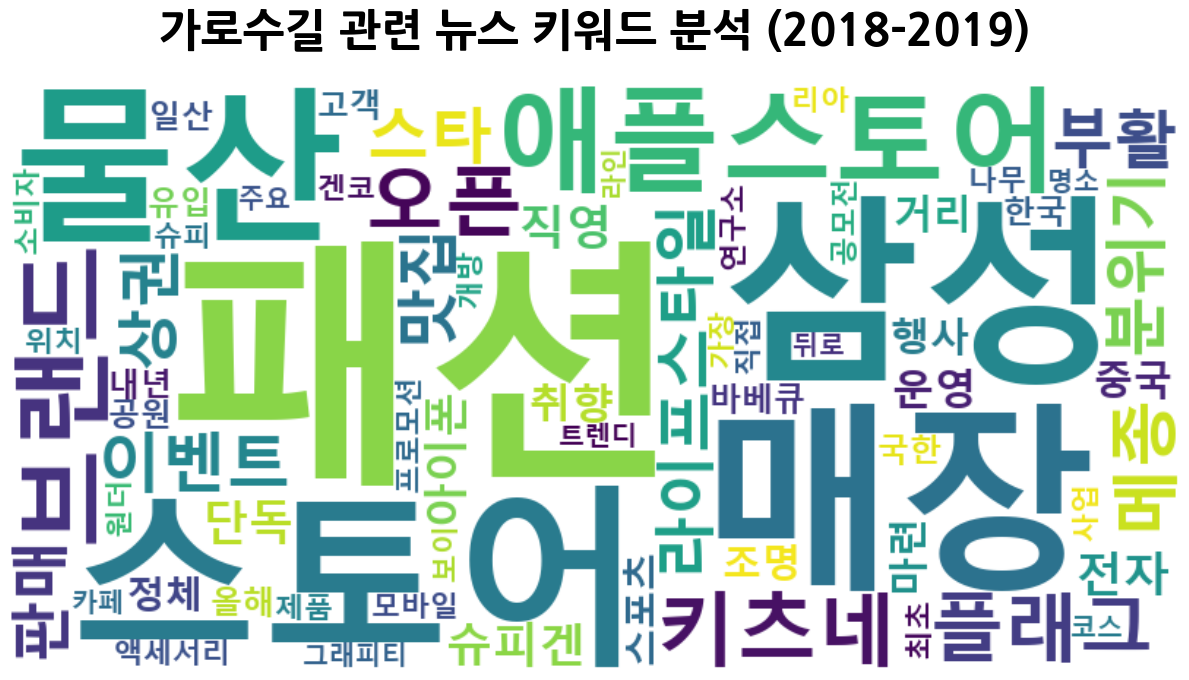

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib  # 한글 폰트 자동 적용
import numpy as np
from PIL import Image

mask_img = np.array(Image.open("../../data_resources/circle.png"))


# 워드클라우드 설정 (마스크 없음)
wc = WordCloud(
    font_path = r"C:\Windows\Fonts\malgunbd.ttf",
    background_color='white',

    width=800,
    height=400
)

# 워드클라우드 생성
wc.generate_from_frequencies(dict1819)

# 시각화
plt.figure(figsize=(12, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("가로수길 관련 뉴스 키워드 분석 (2018-2019)",
          fontsize=32, fontweight='bold', pad=30)
plt.tight_layout()
plt.show()

## 네이버 뉴스 20-22년도 (검색어: 가로수길 -메타세콰이아 -칼바람 -대구 -논산시 -고흥 -인디게임 -경산시 -광양시 -안양 -강진군 -양산 -창원 -포항 -터키)

In [53]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys ## Keys는 키보드라고 생각하면됨
from selenium.webdriver.common.by import By
import time
import pandas as pd

url="https://search.naver.com/search.naver?ssc=tab.news.all&query=%EC%8B%A0%EC%82%AC%20%EA%B0%80%EB%A1%9C%EC%88%98%EA%B8%B8%20-%EC%B6%A9%EB%B6%81%20-%EC%B6%A9%EB%82%A8%20-%EA%B4%91%EC%96%91%EC%8B%9C%20-%EC%95%88%EC%96%91%20-%EA%B0%95%EC%A7%84%EA%B5%B0%20-%EC%96%91%EC%82%B0%20-%EC%B0%BD%EC%9B%90%20-%ED%8F%AC%ED%95%AD%20-%ED%84%B0%ED%82%A4%20-%EB%8B%B4%EC%96%91%20-%EB%B2%A4%EC%B8%A0%20-%EC%A7%84%EC%A3%BC&sm=tab_opt&sort=0&photo=0&field=0&pd=3&ds=2019.07.28&de=2021.12.30&docid=&related=0&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so%3Ar%2Cp%3Afrom20190728to20211230&is_sug_officeid=0&office_category=0&service_area=0"

driver = webdriver.Chrome()
driver.maximize_window
#url로 이동

driver.get(url)
time.sleep(2)

## 스크랩 rep번 내리기
rep = 100

display_box_css = "body"
display_box = driver.find_element(By.CSS_SELECTOR, display_box_css)
for i in range(rep):
    display_box.send_keys(Keys.END)
    time.sleep(1)

# 스크롤 맨위로
display_box.send_keys(Keys.HOME)

# 제목 추출하기
title_css ="a.ox1N67gcMkHhMh7hbfHi.VZxw34rcBHTWHgERxv0b > span"
titles = driver.find_elements(By.CSS_SELECTOR, title_css)

preview_css = "div > a.ox1N67gcMkHhMh7hbfHi.VbDEeYkHZhXLquPjGrKK > span"
previews = driver.find_elements(By.CSS_SELECTOR, preview_css)


temp_dict = {
    "기사제목": [],
    "미리보기": []
}

for title, preview in zip(titles, previews):
    temp_dict["기사제목"].append(title.text)
    temp_dict["미리보기"].append(preview.text)

naver_news_2022 = pd.DataFrame(temp_dict)
naver_news_2022.to_csv("../../data_resources/naver_news_2022.csv", index=False)

naver_news_2022

,기사제목,미리보기
0,가로수길 한복판서 상추 쑥갓 길렀더니…20대 인스타족 몰려왔다,교원그룹의 건강가전 종합 브랜드 웰스(Wells)가 서울 신사동 가로수길에 위치한 ...
1,"공간 메타버스 플랫폼 '트윈코리아', 사전청약 완판",최단 시간 내 완판에 성공한 지역은 '신사-가로수길'로 약 11초 만에 분양을 마감...
2,"웰스, 가로수길에 '웰스팜' 팝업스토어 운영",웰스팜 팝업스토어 전경[이데일리 강경래 기자] 환경가전 브랜드 웰스(Wells)가 ...
3,"""오랜만에 쇼핑"" 신주아, ♥태국재벌 사모님 가로수길 떴다..FLEX 가나요","공개된 사진 속 신주아는 신사동 가로수길에서 쇼핑에 나선 모습. 그는 ""오랜만에 가..."
4,"김현정 ㈜루피움 대표, 신사동 480억원대 건물 매입",관련 업계에 따르면 이곳은 신사역 도보 10분 이내에 위치한 곳으로 접근성이 매우 ...
...,...,...
1005,"‘강남 내 부촌’ 도산대로 집값 상승, 일대 부동산 관심 높아진다",3호선 신사역에서 영동대로 남단까지 약 3km에 달하는 도산대로는 신사역과 가로수길...
1006,"엘본, ‘엔트리 럭셔리’ 넘버원!",오프라인에서는 지난 2018년 서울 강남구 청담동에 과감하게 문을 연 체사레파치오티...
1007,SA “삼성 5G폰 시장서 4위로 밀렸지만… 내년엔 애플 이어 2위 도약할 ...,5G를 처음 지원하는 애플 아이폰12가 정식 출시된 지난해 10월30일 오전 서울 ...
1008,"메트로시티, ‘디즈니’ 캡슐 컬렉션 런칭","이 회사는 지난 16, 17일 양일간 신사동 가로수길 컨셉스토어 ‘빌라 디 메트로시..."


In [54]:
import pandas as pd

df2022 = pd.read_csv("../../data_resources/naver_news_2022.csv")

df2022["concat"] = df2022["기사제목"] + df2022["미리보기"]

df2022["concat"] 

0       가로수길 한복판서 상추 쑥갓 길렀더니…20대 인스타족 몰려왔다교원그룹의 건강가전 종...
1       공간 메타버스 플랫폼 '트윈코리아', 사전청약 완판최단 시간 내 완판에 성공한 지역...
2       웰스, 가로수길에 '웰스팜' 팝업스토어 운영웰스팜 팝업스토어 전경[이데일리 강경래 ...
3       "오랜만에 쇼핑" 신주아, ♥태국재벌 사모님 가로수길 떴다..FLEX 가나요공개된 ...
4       김현정 ㈜루피움 대표, 신사동 480억원대 건물 매입관련 업계에 따르면 이곳은 신사...
                              ...                        
1005    ‘강남 내 부촌’ 도산대로 집값 상승, 일대 부동산 관심 높아진다3호선 신사역에서 ...
1006    엘본, ‘엔트리 럭셔리’ 넘버원!오프라인에서는 지난 2018년 서울 강남구 청담동에...
1007    SA “삼성 5G폰 시장서 4위로 밀렸지만… 내년엔 애플 이어 2위 도약할 ...5...
1008    메트로시티, ‘디즈니’ 캡슐 컬렉션 런칭이 회사는 지난 16, 17일 양일간 신사동...
1009    강남 '펜트힐 루 논현' 상가 회사보유분 2차 분양 진행 "마스터리스 도...또한 ...
Name: concat, Length: 1010, dtype: object

## WORD CLOUD로 키워드 분석을 해보자 (2020-2022)


In [55]:
from konlpy.tag import Okt
import re

okt = Okt()
stop_words = ["신사동","부산","제공", "지난", "피쉬", "세계", "선미", 
              "아르투아","코리아","컬럼비아", "물고기","오후","대표", "사진","덴마크", 
              "동원", "가로수길", "서울", "강남", "기자", "블루", '오니','츠카','타이거',
              "지난", "지역", "프레", "이번", "스텔라", "참치", "사람",
              "최근", "레이스", "당나귀", "니팅", '강남구', '부문', '세대', '밀레', '국내', '진행',
              "보상", "할인", "조짐", "니팅", '이나무', '방문', '체험', '집결', '시작', '연말']
word_list = []

for i, news in enumerate(df2022["concat"].tolist()):
    # 기사에서 특문 제거
    news_clean = re.sub(r"[^가-힣a-zA-Z0-9-\s]", "", news)
    # 형태소 분석 -okt를 이용해서 명사 추출
    result = okt.nouns(news_clean)

    for word in result:
        # 단어가 2글자 이상이거나 불용어가 아닐 때만 사용
        if len(word) > 1 and word not in stop_words:
            word_list.append(word)
    if i % 10 == 0 :
        print(i, result)

0 ['가로수길', '복판', '상추', '쑥갓', '인스타', '족', '교원', '그룹', '건강', '가전', '종합', '브랜드', '웰스', '서울', '신사동', '가로수길', '위치', '복합', '문화', '공간', '옐로우', '바스켓', '식물', '재배', '기', '웰스', '팝업', '스토어', '팝업', '스토어', '입점', '옐로우', '바스', '켓', '기업', '및', '예술가', '특색', '작품', '직', '간접', '체험', '볼', '수', '곳', '최근']
10 ['완탕면', '딤섬', '가로수길', '맛집', '쮸', '신사역', '번', '출구', '도산', '공원', '쪽', '여', '미터', '좌측', '골목', '안', '식당', '여럿', '보이', '그', '중간', '딤섬', '맛집', '쮸즈', '원목', '매장', '위쪽', '소룡포', '그림', '간판', '언뜻', '단층', '보이', '지하', '층', '곳', '점심시간', '주말']
20 ['오비맥주', '맥', '수', '한식', '레시피', '맥', '공식', '인스타그램', '통해', '신사동', '가로수길', '압구정', '로데오', '지역', '맛집', '문어', '숙회', '쭈', '삼겹', '홍꼬탕', '칼', '삼겹살', '등', '메뉴', '레시피', '공개', '앞', '힙맥', '레이스', '위치', '연남', '망원', '지역', '맛집', '대표', '메뉴', '공개', '예정', '맥', '브랜드', '매니저', '힙맥', '레이스', '직접', '방문']
30 ['뉴발란스', '가로수길', '다운', '팝업', '스토어', '오픈', '뉴발란스', '강남구', '신사동', '가로수길', '다운', '팝업', '스토어', '오픈', '전', '뉴발란스', '이번', '팝업', '스토어', '컨셉', '차곡차곡', '이글루', '특성', '매장', '제품', '공개', '팝업', '스토어', '방문', '고객']

In [56]:
from collections import Counter

word_count = Counter(word_list)

print(word_count.most_common(100))

[('스토어', 535), ('오픈', 380), ('매장', 373), ('팝업', 311), ('브랜드', 302), ('상권', 252), ('플래그', 240), ('위치', 226), ('패션', 203), ('백화점', 195), ('압구정', 185), ('운영', 184), ('건물', 170), ('카페', 165), ('거리', 162), ('공간', 155), ('맛집', 150), ('인근', 147), ('통해', 140), ('신사역', 126), ('상가', 115), ('제품', 113), ('현대', 112), ('뷰티', 100), ('시설', 100), ('대형', 100), ('애플', 99), ('문화', 98), ('골목', 95), ('토스', 95), ('청담동', 90), ('웰스', 89), ('고객', 88), ('코로나', 87), ('로데오', 85), ('신사', 84), ('쇼핑', 83), ('분양', 82), ('명품', 79), ('이탈리아', 76), ('스테이션', 76), ('주요', 73), ('레이블', 72), ('상품', 72), ('삼성', 70), ('중심', 69), ('규모', 67), ('스트리트', 67), ('한국', 64), ('버즈', 64), ('사업', 64), ('업계', 63), ('판매', 63), ('공원', 62), ('클린', 62), ('확대', 62), ('매입', 61), ('지하', 61), ('직접', 61), ('커피', 59), ('일대', 58), ('시장', 58), ('호점', 57), ('현재', 56), ('공식', 55), ('출시', 55), ('복합', 54), ('물산', 54), ('친환경', 54), ('부동산', 53), ('지난해', 52), ('쇼룸', 52), ('기업', 51), ('편집', 51), ('가로', 51), ('신세계', 51), ('강남역', 50), ('위해', 50), ('전시', 50), ('생활